In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [71]:
from sklearn.datasets import make_classification 

In [72]:
x,y = make_classification(n_samples=100, n_features = 2, n_informative = 1 , n_redundant = 0 , n_classes = 2 , n_clusters_per_class=1,
                   random_state = 41,hypercube = False , class_sep = 20)

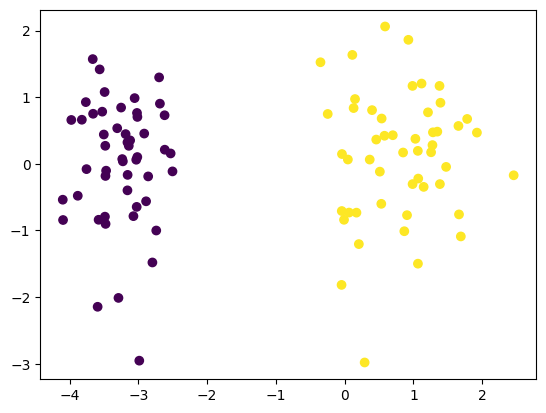

In [73]:
plt.scatter(x[:,0],x[:,1],c = y)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression(penalty = 'none' , solver = 'sag')

In [76]:
lr.fit(x,y)

C:\Users\laksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\laksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [77]:
print(lr.coef_,lr.intercept_)

[[4.81491704 0.21535334]] [5.79204211]


In [78]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

In [79]:
def gd(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr=0.5
    epochs = 2500
    y_hat = sigmoid(np.dot(x,weights))
    
    for i in range(epochs):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr*(np.dot(y-y_hat,x))/x.shape[0]
        
        
    intercept_ = weights[0]
    coef_ = weights[1:]
    
    return intercept_,coef_

In [80]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [81]:
gd(x,y)

(5.148029492159727, array([4.36410145, 0.17189254]))

In [82]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


In [83]:
data = pd.read_csv('iris.csv')

In [84]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
encoder = LabelEncoder()


In [86]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
data['Species'] = encoder.fit_transform(data['Species'])

In [88]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [89]:
data = data[['SepalLengthCm', 'PetalLengthCm', 'Species']]

In [90]:
data.head()

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [91]:
x = data.iloc[:,0:2]
y = data.iloc[:,-1]

In [92]:
x

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [94]:
lr = LogisticRegression(multi_class = 'multinomial')

In [95]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [96]:
y_pred = lr.predict(x_test)

In [97]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [98]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  2,  9]], dtype=int64)

C:\Users\laksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

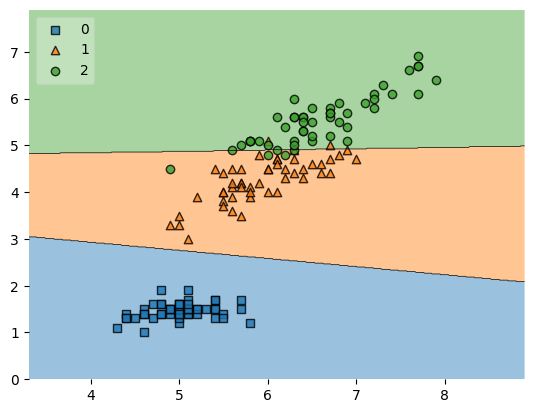

In [105]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values,lr,legend =2)


In [101]:
!pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     -                                        0.0/1.4 MB 991.0 kB/s eta 0:00:02
     --                                       0.1/1.4 MB 919.0 kB/s eta 0:00:02
     ---                                      0.1/1.4 MB 819.2 kB/s eta 0:00:02
     ---                                      0.1/1.4 MB 654.9 kB/s eta 0:00:02
     -----                                    0.2/1.4 MB 748.1 kB/s eta 0:00:02
     ------                                   0.2/1.4 MB 731.4 kB/s eta 0:00:02
     -------                                  0.2/1.4 MB 752.5 kB/s eta 0:00:02
     --------                                 0.3/1.4 MB 741.6 kB/s eta 0:00:02
     ---------                                0.3/1.4 MB 759.5 kB/s eta 0:00:02
     ---------                                0.3/1.4 MB 723.4 kB/s eta 0:00:02
     ----------                               0.4/1.4 MB 716.8 kB/s eta 0:00:02
     -----------                              0.4